In [24]:
%pylab inline

import os
import seaborn as sns

from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename

Populating the interactive namespace from numpy and matplotlib


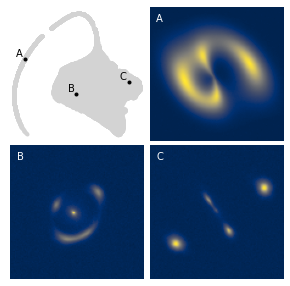

In [2]:
def umap_mock_lens(x0, y0, n_nearest, umap_result, umap_x, umap_y):
    # Distance squared
    d_sq = (umap_x - x0)**2 + (umap_y - y0)**2

    # Get the sorted indices based on the distances
    sorted_indices = np.argsort(d_sq)

    for k in range(n_nearest):
        
        # The kth closest point index
        idx = sorted_indices[k]
        
        # Get the corresponding key of mock lens
        mock_lens_key = umap_result["path"][idx].split('/')[-1]
        tmp = np.where(umap_result["path"] == umap_result["path"][idx])[0]
        idx_pair = np.where(tmp==idx)[0][0]
        img_file = os.path.join('D:/Datasets/2023_strong_lensing_data_set/data_set/', mock_lens_key)
        image_data = fits.getdata(img_file, ext=0)[:, :, idx_pair]
        
    return image_data, idx

        
        
def plot_sample_images():
    output_npy = 'D:/Projects/2023_simsiam_vit_lensing/20230521_powen_umaps/res_092/umap_result.npy'
    umap_result = np.load(output_npy, allow_pickle=True).item()
    umap_x = umap_result["embeddings"][:, 0]
    umap_y = umap_result["embeddings"][:, 1]
    
    annotates = ["A", "B", "C"]
    targets = [(-3, 10), (6, 4), (15, 6)]
    imgs = []
    img_ids = []
    for x, y in targets:
        image, idx = umap_mock_lens(x, y,  1, umap_result, umap_x, umap_y)
        imgs.append(image)
        img_ids.append(idx)
        
    fig, ax = plt.subplots(2, 2, figsize=(5, 5))
    plt.subplots_adjust(wspace=0.005, hspace=0.03)
    
    ax[0, 0].plot(umap_x, umap_y, '.', color = '#D3D3D3', zorder=0, rasterized=True)
    for e, idx in enumerate(img_ids):
        ax[0, 0].plot(umap_x[idx], umap_y[idx], '.', color='k', zorder=0)
        ax[0, 0].annotate(annotates[e], xy=(umap_x[idx]-1.5, umap_y[idx]+0.3), color='k')

    for r in range(2):
        for c in range(2):
            ax[r, c].axis('off')
            ax[r, c].set_aspect('equal', adjustable='box')
            
            i = 2 * (r % 2) + c
            if i == 0:
                continue
            j = i - 1
            ax[r, c].imshow(imgs[j], cmap='cividis')
            ax[r, c].annotate(annotates[j], xy=(5, 12), color='w')
            
    
plot_sample_images()

plt.savefig("figures/umap_sample_images.pdf", bbox_inches='tight')


In [2]:
def get_umap_outputs(output_dir):
    res = {}
    res['umap_result'] = np.load(os.path.join(output_dir, "umap_result.npy"), allow_pickle=True).item()
    res['umap_testsets'] = np.load(os.path.join(output_dir, "umap_testsets.npy"), allow_pickle=True).item()
    return res
    

loaded_umaps = {}  
loaded_umaps['LenSiam'] = get_umap_outputs(
    output_dir=os.path.join('D:/Projects/2023_simsiam_vit_lensing/20230521_powen_umaps/res_092')
)
loaded_umaps['SimSiam'] = get_umap_outputs(
    output_dir=os.path.join('D:/Projects/2023_simsiam_vit_lensing/20230922_powen_umaps/res_094_simsiam')
)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


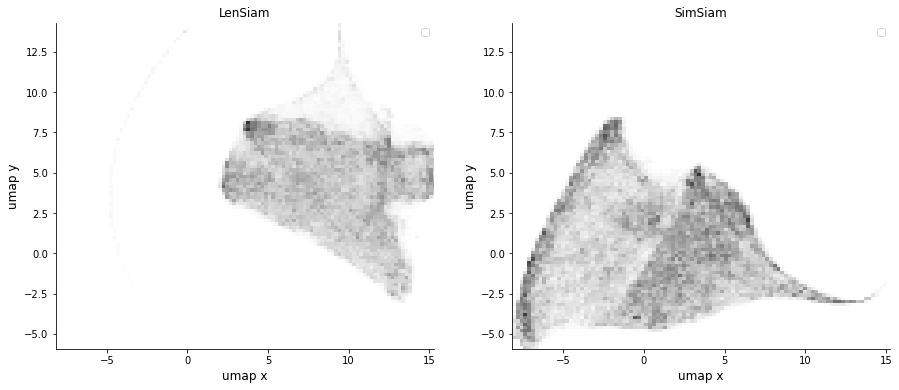

In [32]:
def plot_umap(loaded_umaps):
    fig, ax = plt.subplots(ncols=2, figsize=(15, 6), sharex=True, sharey=True)
#     fig, ax = plt.subplots(ncols=2, figsize=(15, 6))

    ms = 6
    keys = ['LenSiam', 'SimSiam']
    
#     extent4-tuple of float, default: None
# The limits of the bins (xmin, xmax, ymin, ymax)
    
    for c in range(2):
        key = keys[c]
        
        umap_result = loaded_umaps[key]['umap_result']
        umap_testsets = loaded_umaps[key]['umap_testsets']
        
#         ax[c].hexbin(umap_result["embeddings"][:, 0], 
#             umap_result["embeddings"][:, 1], cmap='Greys', bins='log', alpha=0.8)
        
        ax[c].hist2d(umap_result["embeddings"][:, 0], 
            umap_result["embeddings"][:, 1], cmap='Greys', bins=100, alpha=0.8)
        
#         sns.kdeplot(x=umap_result["embeddings"][:, 0], 
#             y=umap_result["embeddings"][:, 1], ax=ax[c])
    
#         ax[c].plot(
#             umap_result["embeddings"][:, 0], 
#             umap_result["embeddings"][:, 1], 
#             '.',
#             color='#D3D3D3', 
#             label=key, 
#             zorder=0, 
#             rasterized=True, 
#             ms=ms,
#         )



#         ax[c].plot(
#             umap_testsets["RealHST"][:, 0], 
#             umap_testsets["RealHST"][:, 1], 
#             '.',
#             color='#f2a400', 
#             label="HST", 
#             zorder=3, 
#             ms=ms,
#         )
#         ax[c].plot(
#             umap_testsets["Lens2022"][:, 0], 
#             umap_testsets["Lens2022"][:, 1], 
#             '.',
#             color='#4379e6', 
#             label="Sim2022", 
#             zorder=1, 
#             ms=ms,
#         )
#         ax[c].plot(
#             umap_testsets["STL10"][:, 0], 
#             umap_testsets["STL10"][:, 1], 
#             '.',
#             color='violet', 
#             label="STL10", 
#             zorder=2, 
#             ms=ms,
#         )
    
#         ax[c].hexbin(
#             umap_testsets["STL10"][:, 0], 
#             umap_testsets["STL10"][:, 1], 
#             cmap='Purples', mincnt=0)
    
#         sns.kdeplot(umap_testsets["STL10"][:, 0], 
#             umap_testsets["STL10"][:, 1], ax=ax[c])
        
    
        ax[c].legend(loc=1, frameon=True, fontsize=10)
        ax[c].set_aspect('equal', adjustable='box')
        ax[c].set_xlabel("umap x", fontsize=12)
        ax[c].set_ylabel("umap y", fontsize=12)
        ax[c].spines[['right', 'top']].set_visible(False)
        ax[c].yaxis.set_tick_params(which='both', labelbottom=True)
        ax[c].set_title(key)


plot_umap(loaded_umaps)

plt.savefig("figures/umap_main.pdf", bbox_inches='tight')

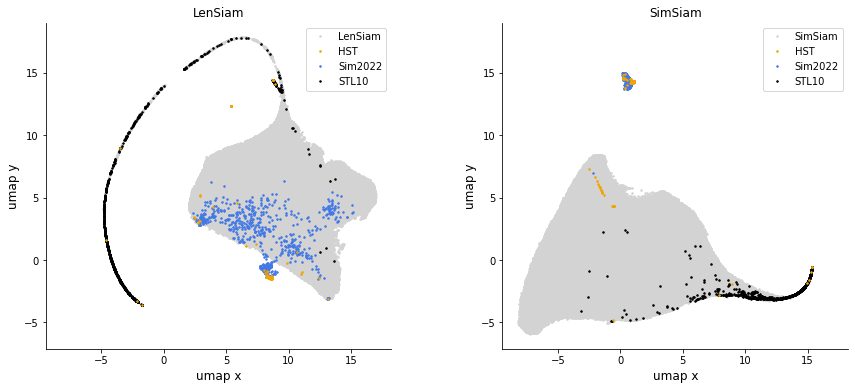

In [12]:
def plot_umap(loaded_umaps):
    fig, ax = plt.subplots(ncols=2, figsize=(15, 6), sharex=True, sharey=True)

    ms = 3
    keys = ['LenSiam', 'SimSiam']
    
    for c in range(2):
        key = keys[c]
        
        umap_result = loaded_umaps[key]['umap_result']
        umap_testsets = loaded_umaps[key]['umap_testsets']
    
        ax[c].plot(
            umap_result["embeddings"][:, 0], 
            umap_result["embeddings"][:, 1], 
            '.',
            color='#D3D3D3', 
            label=key, 
            zorder=0, 
            rasterized=True, 
            ms=ms,
        )
        ax[c].plot(
            umap_testsets["RealHST"][:, 0], 
            umap_testsets["RealHST"][:, 1], 
            '.',
            color='#f2a400', 
            label="HST", 
            zorder=3, 
            ms=ms,
        )
        ax[c].plot(
            umap_testsets["Lens2022"][:, 0], 
            umap_testsets["Lens2022"][:, 1], 
            '.',
            color='#4379e6', 
            label="Sim2022", 
            zorder=1, 
            ms=ms,
        )
        ax[c].plot(
            umap_testsets["STL10"][:, 0], 
            umap_testsets["STL10"][:, 1], 
            '.',
            color='k', 
            label="STL10", 
            zorder=2, 
            ms=ms,
        )
        ax[c].legend(loc=1, frameon=True, fontsize=10)
        ax[c].set_aspect('equal', adjustable='box')
        ax[c].set_xlabel("umap x", fontsize=12)
        ax[c].set_ylabel("umap y", fontsize=12)
        ax[c].spines[['right', 'top']].set_visible(False)
        ax[c].yaxis.set_tick_params(which='both', labelbottom=True)
        ax[c].set_title(key)


plot_umap(loaded_umaps)

plt.savefig("figures/umap_main.pdf", bbox_inches='tight')

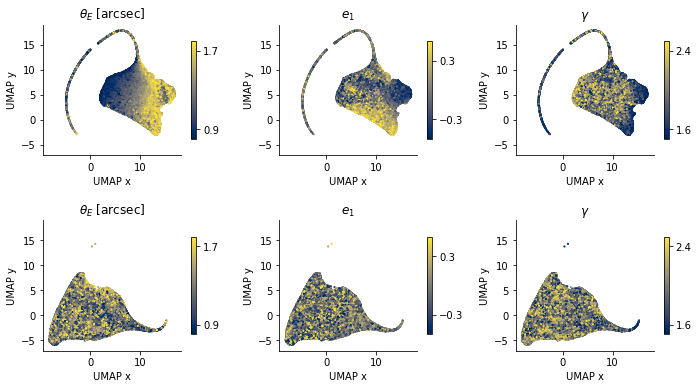

In [61]:
def plot_umap_label(loaded_umaps):
    fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12, 6), sharex=True, sharey=True)
    plt.subplots_adjust(hspace=0.5)
    
    
    keys = ['LenSiam', 'SimSiam']
    
    param_list = ["theta_E", "e1", "gamma"]
    params_map = {
        'theta_E': r"$\theta_E$ [arcsec]",
        'e1': r"$e_1$",
        'gamma': r"$\gamma$",
    }
    cb_ticks = {
        'theta_E': [0.9, 1.7],
        'e1': [-0.3, 0.3],
        'gamma': [1.6, 2.4],   
    }
    
    for r in range(2):
        umap_result = loaded_umaps[keys[r]]['umap_result']
        
        for c in range(len(param_list)):
            key = param_list[c]
            im = ax[r, c].scatter(
                umap_result["embeddings"][:, 0], 
                umap_result["embeddings"][:, 1],
                c=umap_result[key], 
                marker=".", 
                s=5, 
                rasterized=True, 
                cmap='cividis',
            )
            fig.colorbar(im, ax=ax[r, c], shrink=0.75, ticks=cb_ticks[key])
            ax[r, c].set_title(params_map[key])
            ax[r, c].set_aspect('equal', adjustable='box')
        
            ax[r, c].set_xlabel("UMAP x")
            ax[r, c].set_ylabel("UMAP y")
            ax[r, c].spines[['right', 'top']].set_visible(False)
            ax[r, c].xaxis.set_tick_params(which='both', labelbottom=True)
            ax[r, c].yaxis.set_tick_params(which='both', labelbottom=True)



plot_umap_label(loaded_umaps)

plt.savefig("figures/umap_color_params.pdf", bbox_inches='tight')

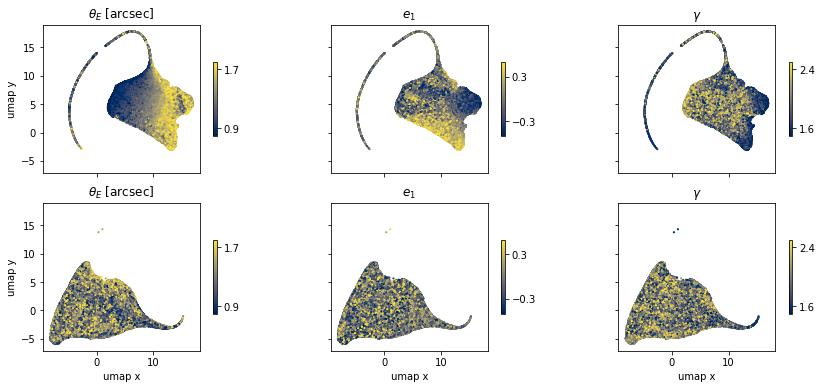

In [36]:
# def plot_umap_label(loaded_umaps):
#     fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12, 6), sharex=True, sharey=True)
#     plt.subplots_adjust(hspace=0.5)
    
    
#     keys = ['LenSiam', 'SimSiam']
    
#     param_list = ["theta_E", "e1", "gamma"]
#     params_map = {
#         'theta_E': r"$\theta_E$ [arcsec]",
#         'e1': r"$e_1$",
#         'e2': r"$e_2$",
#         'center_x': r"$\theta_1$ [arcsec]",
#         'center_y': r"$\theta_2$ [arcsec]",
#         'gamma': r"$\gamma$",
#         'gamma1': r"$\gamma_1$",
#         'gamma2': r"$\gamma_2$",
#     }
#     cb_ticks = {
#         'theta_E': [0.9, 1.7],
#         'e1': [-0.3, 0.3],
#         'gamma': [1.6, 2.4],   
#     }
    
#     for r in range(2):
#         umap_result = loaded_umaps[keys[r]]['umap_result']
        
#         for c in range(len(param_list)):
#             key = param_list[c]
#             im = ax[r, c].scatter(
#                 umap_result["embeddings"][:, 0], 
#                 umap_result["embeddings"][:, 1],
#                 c=umap_result[key], 
#                 marker=".", 
#                 s=5, 
#                 rasterized=True, 
#                 cmap='cividis',
#             )
#             fig.colorbar(im, ax=ax[r, c], shrink=0.75, ticks=cb_ticks[key])
#             ax[r, c].set_title(params_map[key])
#             ax[r, c].set_aspect('equal', adjustable='box')
        
#             ax[r, c].set_xlabel("UMAP x")
#             ax[r, c].set_ylabel("UMAP y")
#             ax[r, c].spines[['right', 'top']].set_visible(False)
#             ax[r, c].xaxis.set_tick_params(which='both', labelbottom=True)
#             ax[r, c].yaxis.set_tick_params(which='both', labelbottom=True)



# plot_umap_label(loaded_umaps)

# plt.savefig("figures/umap_color_params_others.pdf", bbox_inches='tight')